In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from eyeInfo import EyeInfo

calib_points = [
    { "x": 200, "y": 200, 'order':1 },
    { "x": 1672, "y": 200, 'order':2 },
    { "x": 936, "y": 472, 'order':3 },
    { "x": 200, "y": 744, 'order':4 },
    { "x": 1672, "y": 744, 'order':5 }
]

eye = EyeInfo(calib_points=calib_points)
eye.init_eye()

prefix = 'o'

right = './csv/output/outright.csv'
left = './csv/output/outleft.csv'
train = f'./csv/data/{prefix}_fixed_train_data.csv'
predict = f'./csv/data/{prefix}_predict_train_data.csv'

calib_df = eye.calib_df

# right_x = (right_df['screen_x']).tolist()
# right_y = (right_df['screen_y']).tolist()
# left_x = (left_df['screen_x']).tolist()
# left_y = (left_df['screen_y']).tolist()
# mean_x = ((right_df['screen_x'] + left_df['screen_x']) / 2).tolist()
# mean_y = ((right_df['screen_y'] + left_df['screen_y']) / 2).tolist()


File ./data.csv not found.


In [6]:
right_df = pd.read_csv(right)
left_df = pd.read_csv(left)
train_df = pd.read_csv(train)
predict_df = pd.read_csv(predict)
# print(train_df)
mean_df = pd.DataFrame()
mean_df['screen_x'] = (right_df['screen_x'] + left_df['screen_x']) / 2
mean_df['screen_y'] = (right_df['screen_y'] + left_df['screen_y']) / 2


# coloque o tamanho do subset para que o dataframe seja dividido igualmente em 5 pedaços
subset_size = 20
subset_mean_df1 = train_df.iloc[0:subset_size]
subset_mean_df2 = train_df.iloc[subset_size:subset_size*2]
subset_mean_df3 = train_df.iloc[subset_size*2:subset_size*3]
subset_mean_df4 = train_df.iloc[subset_size*3:subset_size*4]
subset_mean_df5 = train_df.iloc[subset_size*4:subset_size*5]

predict_subset_mean_df1 = predict_df.iloc[0:subset_size]
predict_subset_mean_df2 = predict_df.iloc[subset_size:subset_size*2]
# print(subset_mean_df2.shape)
predict_subset_mean_df3 = predict_df.iloc[subset_size*2:subset_size*3]
# print(subset_mean_df3.shape)
predict_subset_mean_df4 = predict_df.iloc[subset_size*3:subset_size*4]
# print(subset_mean_df4.shape)
predict_subset_mean_df5 = predict_df.iloc[subset_size*4:subset_size*5]
# print(subset_mean_df5.shape)

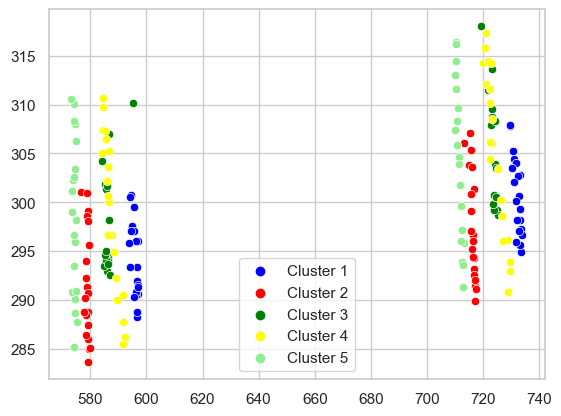

In [7]:
low_lim = 0
upper_lim_x = eye.k_screen_width    
upper_lim_y = eye.k_screen_height

palette = {
    'calib_df': 'black',
    'first': 'blue',
    'second': 'red',
    'third': 'green',
    'fourth': 'yellow',
    'fifth':'lightgreen'
}

legend_dict = {
    palette['first']: 'Cluster 1',
    palette['second']: 'Cluster 2',
    palette['third']: 'Cluster 3',
    palette['fourth']: 'Cluster 4',
    palette['fifth']: 'Cluster 5',
}

sns.set(style="whitegrid")
# sns.scatterplot(data=calib_df, x='screen_x', y='screen_y',size='order', color=palette['calib_df'])

sns.scatterplot(data=subset_mean_df1, x='left_iris_x', y='left_iris_y', color=palette['first'])
sns.scatterplot(data=subset_mean_df2, x='left_iris_x', y='left_iris_y', color=palette['second'])
sns.scatterplot(data=subset_mean_df3, x='left_iris_x', y='left_iris_y', color=palette['third'])
sns.scatterplot(data=subset_mean_df4, x='left_iris_x', y='left_iris_y', color=palette['fourth'])
sns.scatterplot(data=subset_mean_df5, x='left_iris_x', y='left_iris_y', color=palette['fifth'])

sns.scatterplot(data=subset_mean_df1, x='right_iris_x', y='right_iris_y', color=palette['first'])
sns.scatterplot(data=subset_mean_df2, x='right_iris_x', y='right_iris_y', color=palette['second'])
sns.scatterplot(data=subset_mean_df3, x='right_iris_x', y='right_iris_y', color=palette['third'])
sns.scatterplot(data=subset_mean_df4, x='right_iris_x', y='right_iris_y', color=palette['fourth'])
sns.scatterplot(data=subset_mean_df5, x='right_iris_x', y='right_iris_y', color=palette['fifth'])



for color, label in legend_dict.items():
    plt.scatter([], [], c=color, label=label)
plt.legend()

plt.xlabel('')
plt.ylabel('')
# plt.xlim(low_lim, upper_lim_x)
# plt.ylim(low_lim, upper_lim_y)

plt.show()

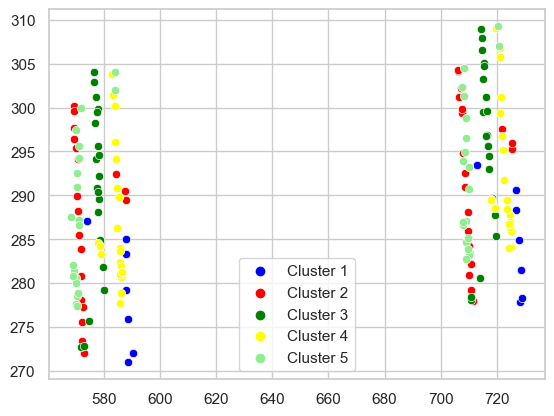

    left_iris_x  left_iris_y  right_iris_x  right_iris_y
0    712.724915   293.403839    574.050293    287.117676
1    712.724915   293.403839    574.050293    287.117676
2    712.724915   293.403839    574.050293    287.117676
3    712.724915   293.403839    574.050293    287.117676
4    712.724915   293.403839    574.050293    287.117676
5    712.724915   293.403839    574.050293    287.117676
6    712.724915   293.403839    574.050293    287.117676
7    712.724915   293.403839    574.050293    287.117676
8    712.724915   293.403839    574.050293    287.117676
9    712.724915   293.403839    574.050293    287.117676
10   712.724915   293.403839    574.050293    287.117676
11   712.724915   293.403839    574.050293    287.117676
12   712.724915   293.403839    574.050293    287.117676
13   712.724915   293.403839    574.050293    287.117676
14   728.336548   277.840240    588.693420    271.015167
15   728.934265   278.320038    590.543945    271.998352
16   728.503906   281.509796   

In [8]:
sns.scatterplot(data=predict_subset_mean_df1, x='right_iris_x', y='right_iris_y', color=palette['first'])
sns.scatterplot(data=predict_subset_mean_df2, x='right_iris_x', y='right_iris_y', color=palette['second'])
sns.scatterplot(data=predict_subset_mean_df3, x='right_iris_x', y='right_iris_y', color=palette['third'])
sns.scatterplot(data=predict_subset_mean_df4, x='right_iris_x', y='right_iris_y', color=palette['fourth'])
sns.scatterplot(data=predict_subset_mean_df5, x='right_iris_x', y='right_iris_y', color=palette['fifth'])

sns.scatterplot(data=predict_subset_mean_df1, x='left_iris_x', y='left_iris_y', color=palette['first'])
sns.scatterplot(data=predict_subset_mean_df2, x='left_iris_x', y='left_iris_y', color=palette['second'])
sns.scatterplot(data=predict_subset_mean_df3, x='left_iris_x', y='left_iris_y', color=palette['third'])
sns.scatterplot(data=predict_subset_mean_df4, x='left_iris_x', y='left_iris_y', color=palette['fourth'])
sns.scatterplot(data=predict_subset_mean_df5, x='left_iris_x', y='left_iris_y', color=palette['fifth'])

for color, label in legend_dict.items():
    plt.scatter([], [], c=color, label=label)
plt.legend()

plt.xlabel('')
plt.ylabel('')

plt.show()
print(predict_subset_mean_df1)